In [0]:
import pandas as pd

In [6]:
!wget http://iali.in/datasets/Social_Network_Ads.csv

--2020-06-02 12:44:47--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv.1’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 12:44:47 (188 MB/s) - ‘Social_Network_Ads.csv.1’ saved [10926/10926]



In [0]:
dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')

In [12]:
dataset.head(100)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
95,15709441,Female,35,44000,0
96,15710257,Female,35,25000,0
97,15582492,Male,28,123000,1
98,15575694,Male,35,73000,0


In [14]:
dataset.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
x = dataset.iloc[:,[2,3]].values

y = dataset.iloc[:,4].values


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

[Text(189.42631578947368, 210.192, 'X[0] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(127.75263157894737, 195.696, 'X[1] <= 90500.0\ngini = 0.307\nsamples = 232\nvalue = [188, 44]'),
 Text(70.48421052631579, 181.2, 'X[0] <= 36.5\ngini = 0.089\nsamples = 193\nvalue = [184, 9]'),
 Text(61.67368421052632, 166.704, 'gini = 0.0\nsamples = 128\nvalue = [128, 0]'),
 Text(79.29473684210527, 166.704, 'X[1] <= 83500.0\ngini = 0.239\nsamples = 65\nvalue = [56, 9]'),
 Text(70.48421052631579, 152.208, 'X[1] <= 67500.0\ngini = 0.198\nsamples = 63\nvalue = [56, 7]'),
 Text(61.67368421052632, 137.712, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(79.29473684210527, 137.712, 'X[0] <= 41.5\ngini = 0.327\nsamples = 34\nvalue = [27, 7]'),
 Text(61.67368421052632, 123.216, 'X[1] <= 70500.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5]'),
 Text(52.863157894736844, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(70.48421052631579, 108.72, 'X[0] <= 40.5\ngini = 0.245\nsample

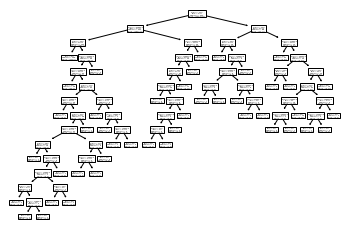

In [26]:
 tree.plot_tree(clf) 

In [0]:
y_pred=clf.predict(x_test)

In [29]:
y_pred


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8625

In [33]:
from sklearn.metrics import classification_report

classes =['0','1']

classification_report(y_test,y_pred,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.96      0.84      0.90        58\n           1       0.69      0.91      0.78        22\n\n    accuracy                           0.86        80\n   macro avg       0.83      0.88      0.84        80\nweighted avg       0.89      0.86      0.87        80\n'

In [35]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
75,1,1
76,0,0
77,0,0
78,0,0


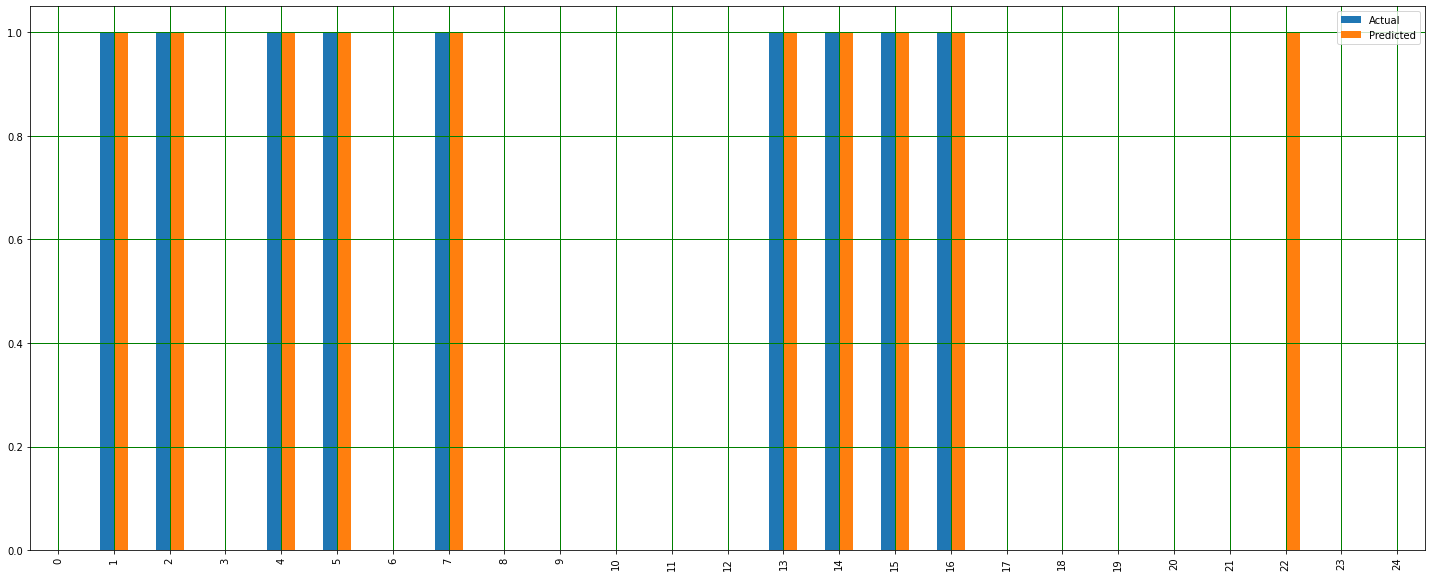

In [43]:
import matplotlib.pyplot as plt
df1 = df.head(25)
df1.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='1', color="green" )
plt.grid(which='minor', linestyle=':', linewidth='1', color="black" )
plt.show()
